# Decision Tree for Classification

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz

In [3]:
# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [4]:
print(iris_X.shape)
print(iris_y.shape)

(150, 4)
(150,)


In [5]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Decision Tree Classifier

In [7]:
# Defining an object for DTC and fitting for whole dataset
df_classifier = DecisionTreeClassifier(max_depth=3,
                                       min_samples_leaf=10,
                                       random_state=1,
                                       criterion='entropy')
df_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=1)

#### Evaluate

In [8]:
y_pred = df_classifier.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.9666666666666667

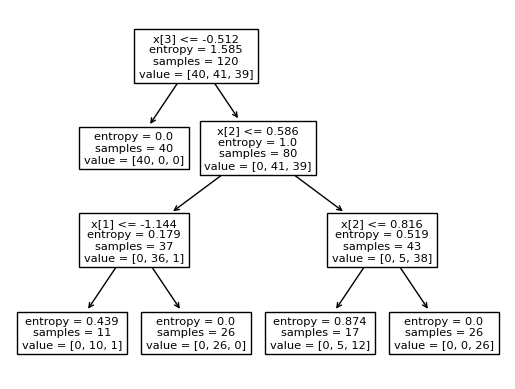

In [10]:
from sklearn import tree

tree.plot_tree(df_classifier)
plt.show()

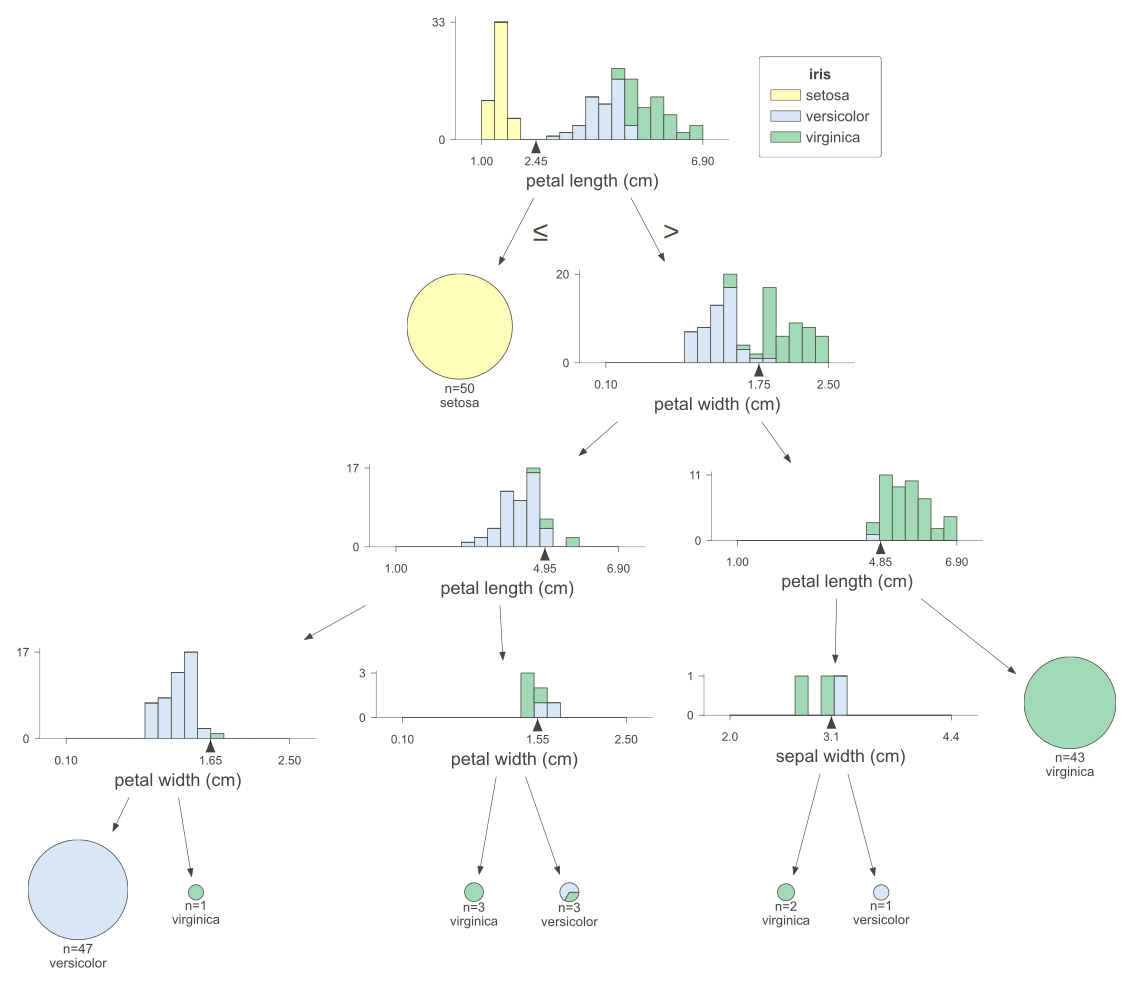

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=iris.feature_names,
                           target_name='iris',
                           class_names=iris.target_names)

viz_model.view(scale=2)
# v = viz_model.view()     # render as SVG into internal object 
# v.show()                 # pop up window
# v.save("iris.svg")  # optionally save as svg